# Exploration of performance data of AutoBooch kombucha brewing system 

In [2]:
import time                                                                                                                                                                             
import pandas as pd                                                                                                                                                                     
import matplotlib.pyplot as plt

Import data from the log file:

In [3]:
boochData = pd.read_csv("brew_log.txt", sep=" ", header=0)

Make sure it's OK (well, enough for jazz):

In [4]:
boochData.head()

,time,temp,state
0,1.521122e+09,24.312,OFF
1,1.521124e+09,24.250,OFF
2,1.521126e+09,24.437,OFF
3,1.521128e+09,24.562,OFF
4,1.521130e+09,24.500,OFF


Are there outliers? (of course there are)

In [5]:
boochData.max()

time     1.52301e+09
temp              85
state             ON
dtype: object

In [6]:
boochData.min()

time     1.52112e+09
temp          17.437
state            OFF
dtype: object

Let's have a quick look at the data (and set the axes and fonts):

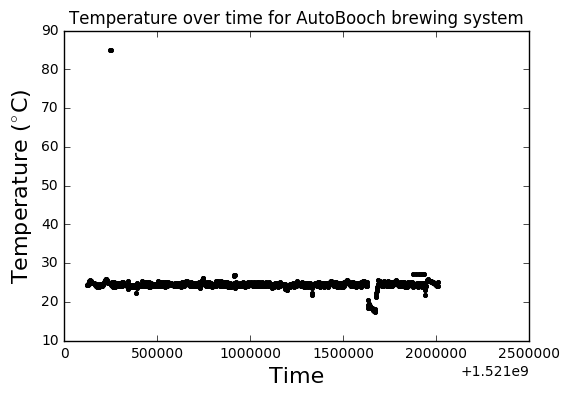

In [9]:
plt.rcParams["font.family"] = "serif"
plt.plot(boochData["time"], boochData["temp"],'.k')
plt.title(r'Temperature over time for AutoBooch brewing system')                                                                                                                        
plt.xlabel("Time", fontsize=16)                                                                                                                                                         
plt.ylabel(r'Temperature ($^{\circ}$C)', fontsize=16)
plt.show()

So we can see how far the outliers are out. 

The lonesome, very high, temperature (85°C) must have been from me leaving the sensor in the sun while changing a batch. Similarly, the low temperatures (down to 17°C) would have been where I left it exposed to the cool air for an hour or so. 

Also note the strange time axis—the default for the time modules is 'seconds since Unix epoch (January 1, 1970)'!

We're concerned here with the operating performance, so we can safely filter the outliers. Let's also look at how much time the data spans:

In [87]:
time.ctime(boochData["time"].min())

'Thu Mar 15 09:00:02 2018'

In [88]:
time.ctime(boochData["time"].max())

'Fri Apr  6 05:00:02 2018'

So the data was only taken for three weeks, in early Spring (Northern Hemisphere). So we don't need to account for seasonal variation. Let's just look at the daily variation:

Define a function to get the hour of the day. This uses the funny syntax from the time module.

In [89]:
def t2hours(t):
    """Return the hour of the day from a time.time structure. Also convert from UTC to my time-zone (US Central, UTC-5)"""
    return (float(time.gmtime(t).tm_hour) + float(time.gmtime(t).tm_min)/60.0 - 5.0) % 24

In [90]:
boochData['hours'] = boochData.apply(lambda col: t2hours(col["time"]), axis=1)

All right, we're ready for a closer look, doc!

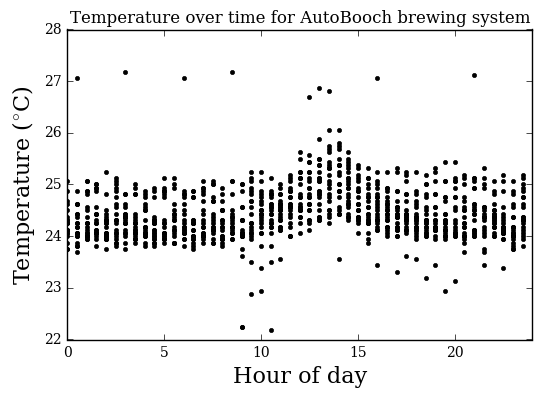

In [91]:
plt.plot(boochData["hours"], boochData["temp"],'.k')
plt.title(r'Temperature over time for AutoBooch brewing system')                                                                                                                        
plt.xlabel("Hour of day", fontsize=16)                                                                                                                                                         
plt.ylabel(r'Temperature ($^{\circ}$C)', fontsize=16)
plt.ylim( 22, 28 )
plt.xlim( 0, 24 )
plt.show()

Note that there are many points for each time of day, but they each have a similar spread (it's almost like we constrained the range ;) ). We're interested in the general performance trend. We'll need to make a tool for that:

In [96]:
import numpy as np
def rngAvg(x, y):
    return np.average(y[(y["hours"]==x)]["temp"])

In [92]:
t = np.arange(0, 24, 0.5, dtype="float")
y = [rngAvg(x,boochData[(boochData["temp"]<30) & (boochData["temp"]>22)]) for x in t]

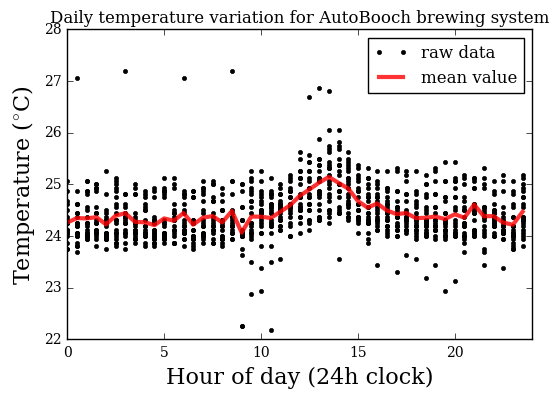

In [97]:
plt.plot(boochData["hours"], boochData["temp"],'.k',label="raw data")
plt.plot(t,y,'-r',linewidth=3,alpha=0.8,label="mean value")
plt.title(r'Daily temperature variation for AutoBooch brewing system')                                                                                                                        
plt.xlabel("Hour of day (24h clock)", fontsize=16)                                                                                                                                                         
plt.ylabel(r'Temperature ($^{\circ}$C)', fontsize=16)
plt.ylim( 22, 28 )
plt.xlim( 0, 24 )
plt.legend()
plt.show()

So you can see the temperature tends to peak around 2pm and is a minimum during the night. Note that this data set is for a little less than a month (right before Spring), so seasonal trends aren't as important as daily ones.

## Conclusion
The AutoBooch is performing as planned! Mean temperatures are within the defined operating range.